<a href="https://colab.research.google.com/github/dngg6688/100-Days-Of-ML-Code/blob/master/lesson4/%E3%80%8CEX4_3%E5%88%A9%E7%94%A8%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E8%99%95%E7%90%86%E9%B3%B6%E5%B0%BE%E8%8A%B1%E5%A4%9A%E5%85%83%E5%88%86%E9%A1%9E_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 設定目前程式資料夾路徑(務必自行更改)

In [2]:
folder="/content/drive/MyDrive/解密AI黑盒子分享/"

## 載入所需套件

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1=plt_font.FontProperties(fname=folder+"字型/kaiu.ttf")
from IPython import display

## 載入pytorch相關套件

In [4]:
import torch
#建立神經網路用
import torch.nn as nn
import torch.nn.functional as F
#載入優化器
from torch import optim
#預處理資料用
from torch.utils.data import Dataset,DataLoader

## 建立DataSet類別

In [5]:
class MyDataset(Dataset):
  def __init__(self,Train=True):
    data=np.loadtxt(folder+"資料集/iris_data.csv",delimiter=",")
    if Train==True:
      data=data[:100]
    else:
      data=data[100:]
    self.data = torch.tensor((data[:,:4]-data[:,:4].mean(axis=0))/data[:,:4].std(axis=0))
    self.label = torch.tensor(data[:,4])
  def __getitem__(self, index):
    return self.data[index], self.label[index]
  def __len__(self):
    return len(self.data)

## 實體化訓練和測試DataSet和DataLoader

In [6]:
TrainDS=MyDataset(Train=True)
TestDS=MyDataset(Train=False)
TrainDL=DataLoader(dataset=TrainDS,batch_size=50,shuffle=True)
TestDL=DataLoader(dataset=TestDS,batch_size=len(TestDS),shuffle=False)

## 建立神經網路類別

In [7]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(4,32)
    self.fc2=nn.Linear(32,16)
    self.fc3=nn.Linear(16,3)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)

    return x

## 實體化神經網路，指定損失函數和優化器

In [8]:
net=Net()
optimizer = optim.SGD(net.parameters(), lr=0.1)
LossFun=nn.CrossEntropyLoss()
Step_L=[]

## 開始訓練神經網路

In [9]:
net.train()
for epoch in range(1000):
  for data,label in TrainDL:
    optimizer.zero_grad()
    Yh=net(data.float())
    loss=LossFun(Yh,label.long())#資料丟到cross entropy 因為要做one hot 所以資料一定要整數 在pytorch整數表示為long
    Step_L.append(float(loss))
    loss.backward()
    optimizer.step()
  print("訓練回合：",epoch+1,"損失值：",loss)
  display.clear_output(wait=True)

訓練回合： 1000 損失值： tensor(0.0061, grad_fn=<NllLossBackward0>)


## 觀察訓練過程中的損失函數Loss變化

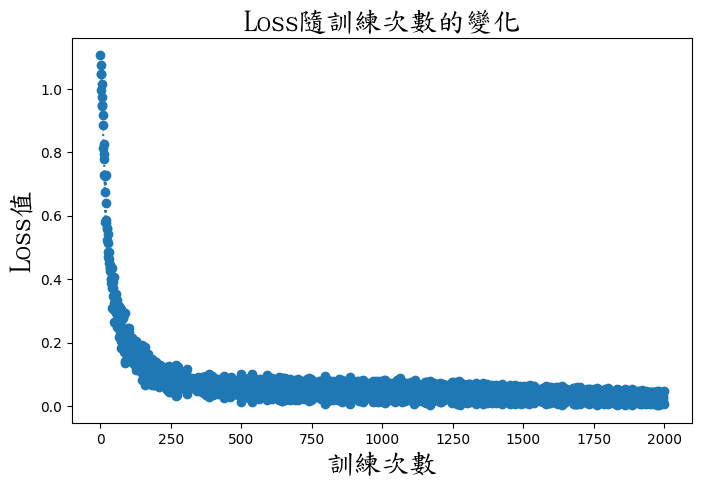

In [10]:
plt.figure(figsize=(8,5))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_L,":o")
plt.show()

In [11]:
net.eval()
with torch.no_grad():
  data,label=next(TestDL.__iter__())
  output = net(data.float())
print("驗證資料準確度：",(torch.argmax(output,dim=1)==label).sum().item()*100/len(TestDS),"%")

驗證資料準確度： 98.0 %
